In [15]:
!pip install tensorflow


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/390.3 MB 8.4 MB/s eta 0:00:47
   ------------------

In [36]:
import cv2
print(cv2.__version__)


ModuleNotFoundError: No module named 'cv2'

In [6]:
# Make sure to run this only after setting up the Kaggle API with kaggle.json file
!kaggle datasets download -d msambare/fer2013


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0




  0%|          | 0.00/60.3M [00:00<?, ?B/s]
  2%|1         | 1.00M/60.3M [00:00<00:42, 1.48MB/s]
  3%|3         | 2.00M/60.3M [00:00<00:21, 2.79MB/s]
  5%|4         | 3.00M/60.3M [00:00<00:14, 4.19MB/s]
  8%|8         | 5.00M/60.3M [00:01<00:08, 6.54MB/s]
 10%|9         | 6.00M/60.3M [00:01<00:08, 7.08MB/s]
 12%|#1        | 7.00M/60.3M [00:01<00:07, 7.67MB/s]
 13%|#3        | 8.00M/60.3M [00:01<00:06, 8.03MB/s]
 17%|#6        | 10.0M/60.3M [00:01<00:05, 8.95MB/s]
 18%|#8        | 11.0M/60.3M [00:01<00:05, 8.96MB/s]
 22%|##1       | 13.0M/60.3M [00:02<00:05, 9.42MB/s]
 23%|##3       | 14.0M/60.3M [00:02<00:05, 9.61MB/s]
 25%|##4       | 15.0M/60.3M [00:02<00:04, 9.55MB/s]
 27%|##6       | 16.0M/60.3M [00:02<00:04, 9.52MB/s]
 28%|##8       | 17.0M/60.3M [00:02<00:04, 9.36MB/s]
 30%|##9       | 18.0M/60.3M [00:02<00:04, 9.48MB/s]
 31%|###1      | 19.0M/60.3M [00:02<00:04, 9.42MB/s]
 33%|###3      | 20.0M/60.3M [00:02<00:04, 8.96MB/s]
 35%|###4      | 21.0M/60.3M [00:02<00:04, 9.33MB/s]
 

In [11]:
!pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [40]:
train_happy_dir = 'C:/Users/user/Documents/JupyterNotebook Projects/fer2013/train/happy'
train_sad_dir = 'C:/Users/user/Documents/JupyterNotebook Projects/fer2013/train/sad'
test_happy_dir = 'C:/Users/user/Documents/JupyterNotebook Projects/fer2013/test/happy'
test_sad_dir = 'C:/Users/user/Documents/JupyterNotebook Projects/fer2013/test/sad'

In [42]:

def load_images_from_directory(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust according to your file types
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            img = cv2.resize(img, (48, 48))  # Resize to 48x48
            images.append(img)
            labels.append(label)
    return images, labels


In [87]:
from tensorflow.keras.preprocessing import image

In [55]:
train_images_happy, train_labels_happy = load_images_from_directory(train_happy_dir, 0)  # 0 for 'happy'
train_images_sad, train_labels_sad = load_images_from_directory(train_sad_dir, 1)  # 1 for 'sad'

test_images_happy, test_labels_happy = load_images_from_directory(test_happy_dir, 0)
test_images_sad, test_labels_sad = load_images_from_directory(test_sad_dir, 1)

In [53]:
test_labels_sad

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [56]:
import numpy as np

# Combine happy and sad images and labels for training
train_images = np.concatenate((train_images_happy, train_images_sad), axis=0)
train_labels = np.concatenate((train_labels_happy, train_labels_sad), axis=0)

# Combine happy and sad images and labels for testing
test_images = np.concatenate((test_images_happy, test_images_sad), axis=0)
test_labels = np.concatenate((test_labels_happy, test_labels_sad), axis=0)

print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)


Training data shape: (12045, 48, 48)
Test data shape: (3021, 48, 48)


In [59]:
# Normalize pixel values to [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
import numpy as np

# Convert grayscale images to RGB by repeating the channels
def convert_to_rgb(images):
    return np.stack([images] * 3, axis=-1)  


train_images_rgb = convert_to_rgb(train_images)
test_images_rgb = convert_to_rgb(test_images)


print("Training data shape:", train_images_rgb.shape)
print("Test data shape:", test_images_rgb.shape)


Training data shape: (12045, 48, 48, 3)
Test data shape: (3021, 48, 48, 3)


In [65]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [71]:
history = model.fit(train_images_rgb, train_labels, epochs=9, batch_size=32, validation_data=(test_images_rgb, test_labels))


Epoch 1/9
377/377 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.7635 - loss: 0.4745 - val_accuracy: 0.7848 - val_loss: 0.4403
Epoch 2/9
377/377 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.7993 - loss: 0.4131 - val_accuracy: 0.8110 - val_loss: 0.3925
Epoch 3/9
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.8329 - loss: 0.3614 - val_accuracy: 0.8361 - val_loss: 0.3641
Epoch 4/9
377/377 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8563 - loss: 0.3175 - val_accuracy: 0.8318 - val_loss: 0.3676
Epoch 5/9
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.8751 - loss: 0.2776 - val_accuracy: 0.8497 - val_loss: 0.3373
Epoch 6/9
377/377 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.8989 - loss: 0.2390 - val_accuracy: 0.8305 - val_loss: 0.4010
Epoch 7/9
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9122 - loss: 0.2065 - val_accuracy: 0.8537 - val_loss: 0.3527
Epoch 8/9
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.9289 - loss: 0.1807 - val_accu

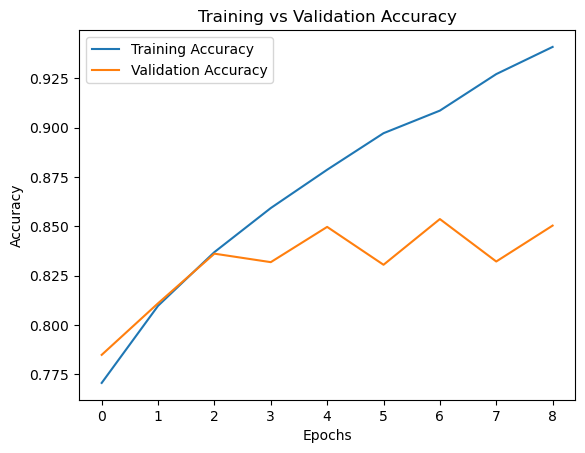

In [73]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


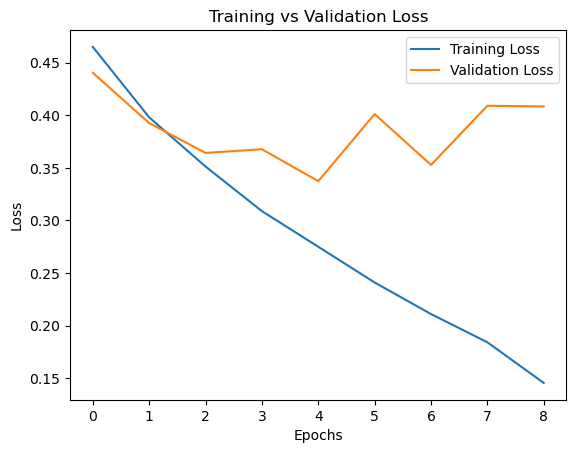

In [75]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


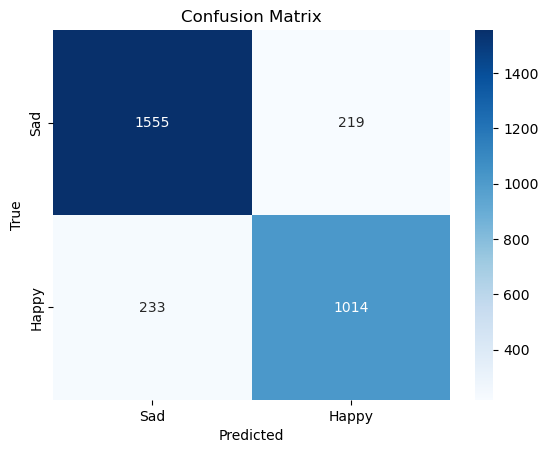

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Assuming you have test_labels and predicted_labels from the model
y_pred = model.predict(test_images_rgb)
y_pred = np.round(y_pred)  # Convert probabilities to binary (0 or 1)

cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sad', 'Happy'], yticklabels=['Sad', 'Happy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


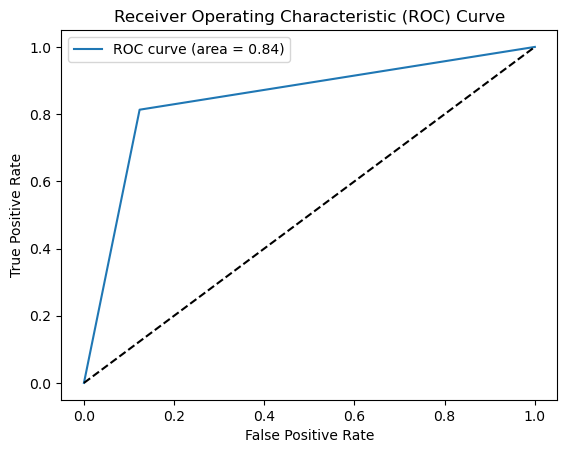

In [79]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()


In [81]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred, target_names=['Sad', 'Happy']))


              precision    recall  f1-score   support

         Sad       0.87      0.88      0.87      1774
       Happy       0.82      0.81      0.82      1247

    accuracy                           0.85      3021
   macro avg       0.85      0.84      0.85      3021
weighted avg       0.85      0.85      0.85      3021



In [83]:
model.save('emotion_model.keras') 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


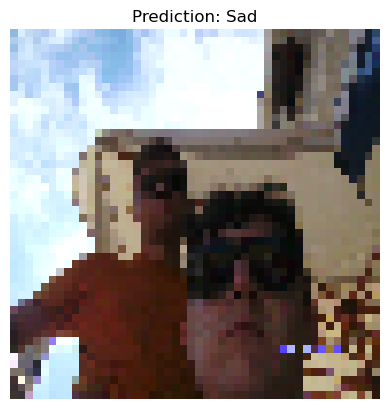

The image is predicted to be: Sad


In [89]:
def predict_image(image_path):
   
    img = image.load_img(image_path, target_size=(48, 48))
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Normalize the image (same as during training)
    img_array = img_array / 255.0
    
    # Add batch dimension (because the model expects a batch of images)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class (Happy or Sad)
    prediction = model.predict(img_array)
    
    # Round the prediction to get a binary output (0 for Sad, 1 for Happy)
    prediction = np.round(prediction)

    # Display the image and the prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title("Prediction: " + ("Happy" if prediction == 1 else "Sad"))
    plt.show()

    # Return the prediction result
    return "Happy" if prediction == 1 else "Sad"

# Example usage
image_path = 'D:\\data\\sad\\BILD2539.JPG' 
result = predict_image(image_path)
print(f"The image is predicted to be: {result}")


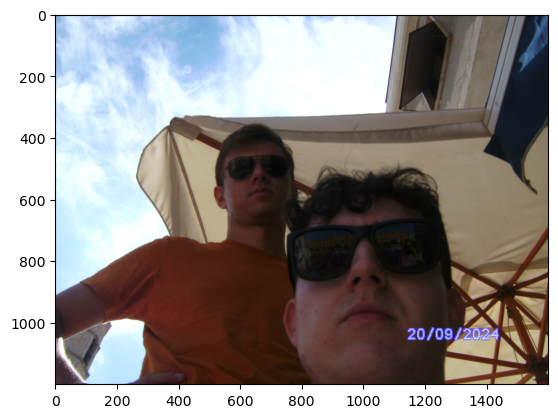

In [91]:
img1 = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()